# Party Affiliation Prediction

![](img/Congress.jpg)

### Objective
Predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues.

### Dataset
* Congressional Voting Records
* Consists of votes made by US House of Representatives Congressmen. 

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

In [85]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Set plotting style
plt.style.use('ggplot')

In [2]:
# Load dataset

First we perform exploratory data analysis (EDA) to understand the structure of the data. 

In [79]:
Column_names = ['party',
                'handicapped-infants', 
                'water-project-cost-sharing', 
                'adoption-of-the-budget-resolution', 
                'physician-fee-freeze',
                'el-salvador-aid',
                'religious-groups-in-schools',
                'anti-satellite-test-ban',
                'aid-to-nicaraguan-contras',
                'mx-missile',
                'immigration',
                'synfuels-corporation-cutback',
                'education-spending',
                'superfund-right-to-sue',
                'crime',
                'duty-free-exports',
                'export-administration-act-south-africa']
df = pd.read_csv('house-votes-84.data.txt', index_col=False, names=Column_names)

In [80]:
# Cleaning
# Convert vote to boolean integers and assume ? to be a no
for c in df.columns[1::]:
    df[c] = df[c].map({'n': 0, 'y': 1, '?': 1})

In [81]:
df

party  handicapped-infants  water-project-cost-sharing  \
0    republican                    0                           1   
1    republican                    0                           1   
2      democrat                    1                           1   
3      democrat                    0                           1   
4      democrat                    1                           1   
5      democrat                    0                           1   
6      democrat                    0                           1   
7    republican                    0                           1   
8    republican                    0                           1   
9      democrat                    1                           1   
10   republican                    0                           1   
11   republican                    0                           1   
12     democrat                    0                           1   
13     democrat                    1                           1   
14   republican                    0                           1   
15   republican                    0                           1   
16     democrat                    1                           0   
17     democrat                    1                           1   
18   republican                    0                           1   
19     democrat                    1                           1   
20     democrat                    1                           1   
21     democrat                    1                           1   
22     democrat                    1                           1   
23     democrat                    1                           1   
24     democrat                    1                           0   
25     democrat                    1                           0   
26     democrat                    1                           0   
27     democrat                    1                           1   
28   republican                    1                           0   
29     democrat                    1                           1   
..          ...                  ...                         ...   
405  republican                    0                           0   
406    democrat                    1                           0   
407    democrat                    0                           0   
408    democrat                    1                           0   
409  republican                    0                           0   
410  republican                    0                           0   
411    democrat                    1                           0   
412  republican                    0                           0   
413  republican                    1                           1   
414    democrat                    1                           1   
415    democrat                    0                           1   
416  republican                    1                           1   
417    democrat                    1                           1   
418    democrat                    1                           1   
419    democrat                    1                           1   
420  republican                    1                           1   
421    democrat                    0                           1   
422    democrat                    0                           0   
423    democrat                    0                           1   
424    democrat                    0                           1   
425    democrat                    0                           0   
426    democrat                    1                           0   
427  republican                    0                           0   
428    democrat                    1                           1   
429    democrat                    1                           0   
430  republican                    0                           0   
431    democrat                    0                           0  

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                                     435 non-null object
handicapped-infants                       435 non-null int64
water-project-cost-sharing                435 non-null int64
adoption-of-the-budget-resolution         435 non-null int64
physician-fee-freeze                      435 non-null int64
el-salvador-aid                           435 non-null int64
religious-groups-in-schools               435 non-null int64
anti-satellite-test-ban                   435 non-null int64
aid-to-nicaraguan-contras                 435 non-null int64
mx-missile                                435 non-null int64
immigration                               435 non-null int64
synfuels-corporation-cutback              435 non-null int64
education-spending                        435 non-null int64
superfund-right-to-sue                    435 non-null int64
crime                                   

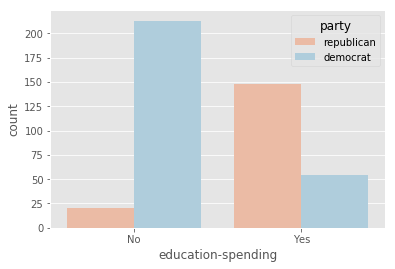

In [74]:
# Let's take a look at the difference between the 2 parties on the education bill
plt.figure()
sns.countplot(x='education-spending', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

## Fitting a classifier

The data must adhere to the format required by the scikit-learn API. 
* The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. 
* The target needs to be a single column with the same number of observations as the feature data. 

In [82]:
# Create arrays for the features and the response variable
y = df['party'].values
x = df.drop('party', axis=1).values

Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure x and y are NumPy arrays. 
Without using .values, x and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.

In [86]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [92]:
x_new = np.array([[0,
                  0,
                  1,
                  0,
                  0,
                  0,
                  1,
                  1,
                  1,
                  0,
                  1,
                  0,
                  0,
                  0,
                  1,
                  1]])
               
x_new

array([[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1]])

In [94]:
prediction = knn.predict(x_new)
print('This person is predicted to be a {}'.format(prediction))

This person is predicted to be a ['democrat']
